# TODO 

- Data from 2000-2010
- Hourly values of PV-Pot
    - Find min/max
    - Daily averages
    - Weekly averages
- Sum up over europes landmass
-  Rank it by the highest - Take x many highest cells that are needed
    - this will kind of already give the area 
- Take mean over Europe?? take mean over Gridcells in Europe?
    - 1000km sidelenght find minimum area? Is it consistent?
    - Get the means in the Gridcells hourly/weekly
    - Compare it throughout the years
          - Does the grid with pv change
          - Values change?

## Get area for worst case! 

In [36]:
import xarray as xr
import matplotlib.pyplot as plt
path = "/home/yannickh00/ICM/Europe_Task/Results/"
year = 2000
month = 1

In [39]:
pvpot=xr.open_mfdataset(path+ f"pvpot_{year}.nc", engine="netcdf4", chunks={"valid_time":1e5} )
print(pvpot)

<xarray.Dataset> Size: 10MB
Dimensions:                        (latitude: 280, longitude: 715, month: 12)
Coordinates:
    number                         int64 8B ...
  * latitude                       (latitude) float64 2kB 89.75 89.5 ... 20.0
  * longitude                      (longitude) float64 6kB 0.0 0.25 ... 178.5
    spatial_ref                    int64 8B ...
  * month                          (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    __xarray_dataarray_variable__  (month, latitude, longitude) float32 10MB dask.array<chunksize=(12, 280, 715), meta=np.ndarray>


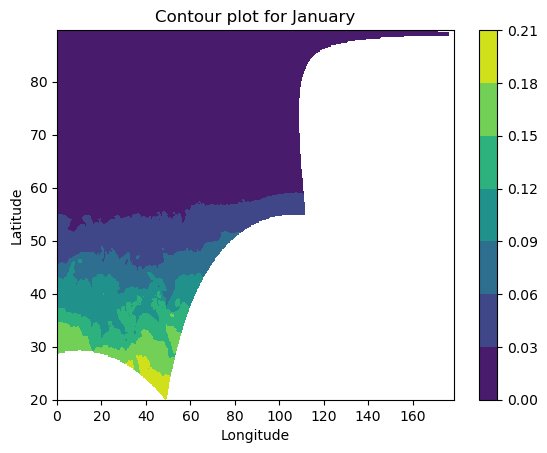

In [40]:
# Extract the data variable
data = pvpot['__xarray_dataarray_variable__']

# Select the specific month (e.g., January: month=1)
selected_data = data.sel(month=1)

# Convert to NumPy array for contour plotting
plt.contourf(data.longitude, data.latitude, selected_data.values)
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Contour plot for January")
plt.show()
